# Run BMA on COSMOS

In this notebook, I edited the copa functions in order to run BMA on the COSMOS matched data.

In [1]:
import esutil
import numpy as np
import h5py
import os

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import matplotlib.pyplot as plt

In [3]:
from astropy.table import Table, vstack, join
from astropy.io.fits import getdata

In [4]:
names = ['../data/%s_indices_matched'%field for field in ['des','cosmos']]

In [5]:
rowsDES    = np.load(names[0]+'_01arcsec.npy')
rowsCOSMOS = np.load(names[1]+'_01arcsec.npy')

In [6]:
des_deep_field_infile = '/data/des70.a/data/annis/StellarMass-2021/y3_deep_fields.fits'
des0 = Table(getdata(des_deep_field_infile))

In [7]:
cosmo_infile = '/data/des61.a/data/johnny/COSMOS/COSMOS2015_Laigle+_v1.1.fits'
cosmo0  = Table(getdata(cosmo_infile))

In [8]:
des   = des0[rowsDES]
cosmo = cosmo0[rowsCOSMOS]

In [107]:
des['row']       = rowsDES
des['rowCOSMOS'] = rowsCOSMOS

cosmo['row']    = rowsCOSMOS
cosmo['rowDES'] = rowsDES

In [298]:
des['z_true'] = cosmo['PHOTOZ']
des['smass']  = cosmo['MASS_BEST']
des['GALAXY'] = cosmo['TYPE']

In [12]:
## Testing sky match

Text(0.5,0,'$RA^{COSMO} - RA^{DES}$ [arcsec]')

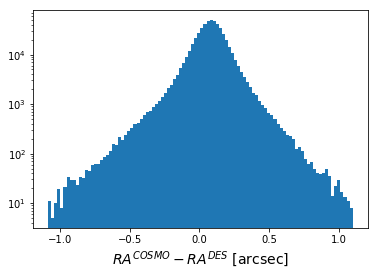

In [13]:
_ = plt.hist((cosmo['ALPHA_J2000']-des['RA'])*3600,bins=100)
plt.yscale('log')
plt.xlabel(r'$RA^{COSMO} - RA^{DES}$ [arcsec]',fontsize=14)

In [14]:
des0    = 0
cosmos0 = 0

In [15]:
des.colnames

['ID',
 'RA',
 'DEC',
 'TILENAME',
 'MAG_U',
 'MAG_G',
 'MAG_R',
 'MAG_I',
 'MAG_Z',
 'MAG_J',
 'MAG_H',
 'MAG_KS',
 'MAGERR_U',
 'MAGERR_G',
 'MAGERR_R',
 'MAGERR_I',
 'MAGERR_Z',
 'MAGERR_J',
 'MAGERR_H',
 'MAGERR_KS',
 'BDF_FRACDEV',
 'BDF_T',
 'BDF_T_RATIO']

In [208]:
cosmo.colnames

['ALPHA_J2000',
 'DELTA_J2000',
 'NUMBER',
 'X_IMAGE',
 'Y_IMAGE',
 'ERRX2_IMAGE',
 'ERRY2_IMAGE',
 'ERRXY_IMAGE',
 'FLAG_HJMCC',
 'FLUX_RADIUS',
 'KRON_RADIUS',
 'EBV',
 'FLAG_PETER',
 'FLAG_COSMOS',
 'FLAG_DEEP',
 'FLAG_SHALLOW',
 'Ks_FLUX_APER2',
 'Ks_FLUXERR_APER2',
 'Ks_FLUX_APER3',
 'Ks_FLUXERR_APER3',
 'Ks_MAG_APER2',
 'Ks_MAGERR_APER2',
 'Ks_MAG_APER3',
 'Ks_MAGERR_APER3',
 'Ks_MAG_AUTO',
 'Ks_MAGERR_AUTO',
 'Ks_MAG_ISO',
 'Ks_MAGERR_ISO',
 'Ks_FLAGS',
 'Ks_IMAFLAGS_ISO',
 'Y_FLUX_APER2',
 'Y_FLUXERR_APER2',
 'Y_FLUX_APER3',
 'Y_FLUXERR_APER3',
 'Y_MAG_APER2',
 'Y_MAGERR_APER2',
 'Y_MAG_APER3',
 'Y_MAGERR_APER3',
 'Y_MAG_AUTO',
 'Y_MAGERR_AUTO',
 'Y_MAG_ISO',
 'Y_MAGERR_ISO',
 'Y_FLAGS',
 'Y_IMAFLAGS_ISO',
 'H_FLUX_APER2',
 'H_FLUXERR_APER2',
 'H_FLUX_APER3',
 'H_FLUXERR_APER3',
 'H_MAG_APER2',
 'H_MAGERR_APER2',
 'H_MAG_APER3',
 'H_MAGERR_APER3',
 'H_MAG_AUTO',
 'H_MAGERR_AUTO',
 'H_MAG_ISO',
 'H_MAGERR_ISO',
 'H_FLAGS',
 'H_IMAFLAGS_ISO',
 'J_FLUX_APER2',
 'J_FLUXERR_APER2',


# Visualize distributions

Galaxy/Star Separation

Text(0.5,0,'gal/star')

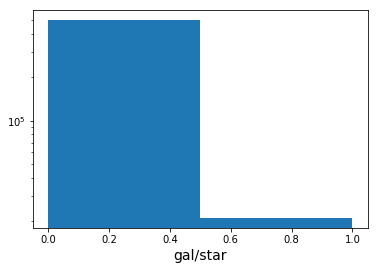

In [19]:
plt.hist(cosmo['TYPE'],bins=np.array([0.,0.5,1.0]))
plt.yscale('log')
plt.xlabel('gal/star',fontsize=14)

Photo-z

Text(0.5,0,'Photo-z')

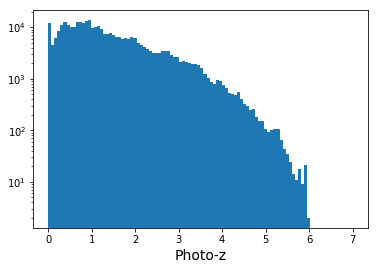

In [22]:
_ = plt.hist(cosmo['PHOTOZ'],bins=np.linspace(0,7,101))
plt.yscale('log')
plt.xlabel('Photo-z',fontsize=14)

Stellar Mass

Text(0.5,0,'Log$(M_{\\star}/M_{\\odot})$')

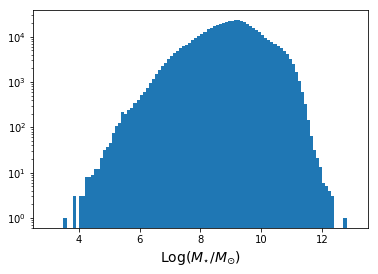

In [38]:
_ = plt.hist(cosmo['MASS_BEST'],bins=np.linspace(3.,13.,101))
plt.yscale('log')
plt.xlabel('Log$(M_{\star}/M_{\odot})$',fontsize=14)

Text(0.5,0,'$\\chi^2$')

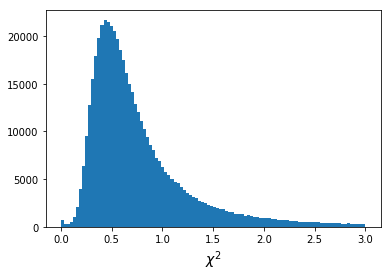

In [23]:
_ = plt.hist(cosmo['CHI2_BEST'],bins=np.linspace(0,3,101))
plt.xlabel(r'$\chi^2$',fontsize=14)

In [219]:
def get_log(x):
    xlog=np.log10(x)
    xlog[np.isnan(xlog)] = -99
    xlog[np.isinf(xlog)] = -99
    return xlog

def filter_nan_inf(x):
    x[np.isnan(x)] = -99
    x[np.isinf(x)] = -99
    return x

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


Text(0.5,0,'Log(mag_err)')

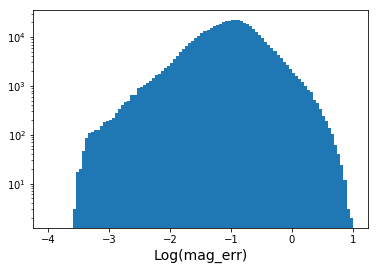

In [50]:
_ = plt.hist(get_log(des['MAGERR_G']),bins=np.linspace(-4.,1.,101))
plt.yscale('log')
plt.xlabel('Log(mag_err)',fontsize=14)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


Text(0,0.5,'log(mag_err)')

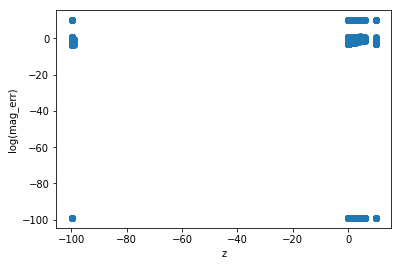

In [63]:
plt.scatter(des['z_true'],get_log(des['MAGERR_G']))
plt.xlabel('z')
plt.ylabel('log(mag_err)')

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


Text(0,0.5,'log(mag_err)')

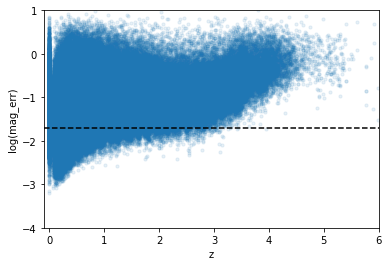

In [64]:
plt.scatter(des['z_true'],get_log(des['MAGERR_G']),s=10,alpha=0.1)
plt.axhline(np.log10(0.02),ls='--',color='k')
plt.xlim(-0.1,6.)
plt.ylim(-4,1.)
plt.xlabel('z')
plt.ylabel('log(mag_err)')

## Prepare imput files

## Mask

In [363]:
zmin,zmax   = 0.01,5.
mag_i_max   = 26.
mag_err_min = 10**(-4.)

galaxies= des['GALAXY']
z       = des['z_true']
mag_i   = des['MAG_I']
mass    = des['smass']
filters = ['G','R','I','Z']


In [364]:
mask = galaxies==0
mask&= (z>=zmin)&(z<=zmax)
mask&= mag_i<= mag_i_max
mask&= mass>0.

for fi in filters:
    mask &= des['MAGERR_%s'%fi]>= mag_err_min

In [365]:
fraction = 100.*np.count_nonzero(mask)/len(mask)

print('input  size :%i'%(len(mask)))
print('masked size :%i'%(np.count_nonzero(mask)))
print('fraction    :%.2f %%'%fraction)

input  size :523255
masked size :230370
fraction    :44.03 %


In [366]:
des

ID,RA,DEC,TILENAME,MAG_U,MAG_G,MAG_R,MAG_I,MAG_Z,MAG_J,MAG_H,MAG_KS,MAGERR_U,MAGERR_G,MAGERR_R,MAGERR_I,MAGERR_Z,MAGERR_J,MAGERR_H,MAGERR_KS,BDF_FRACDEV,BDF_T,BDF_T_RATIO,z_true,row,rowCOSMOS,smass,GALAXY
int64,float64,float64,str32,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,int64,int64,float64,int16
712173680,149.600707,2.713138,COSMOS_C08,27.3778322917553,26.9781371667033,25.5088204105399,25.6918550380002,26.0357187345594,25.4112786814518,26.2674613891035,24.0858506993784,0.564024085130257,0.277533698469512,0.16478644741654,0.19959632399982,0.375341903641782,0.267208447996299,0.571505615966357,0.0819104028202873,0.498473768695683,0.135859513438288,0.121914640210162,3.3731,1741391,929860,9.45775,0
712173681,149.613349,2.713143,COSMOS_C08,26.9025329917674,26.3650722023603,26.1612715712894,24.9727960420911,24.928536203365,24.5148956149117,24.2765997573547,24.066898759656,0.354799388835707,0.135787821200363,0.167405837688809,0.0808439243562239,0.127087590467633,0.0811683614325406,0.0803366462670274,0.0528429298586772,0.498270201926742,-0.0377307626034559,-0.0340170354197158,0.7112,1741392,930040,8.72401,0
712173682,149.617751,2.713123,COSMOS_C08,25.7987457058312,25.6672440523786,25.6109178674535,25.3113597598369,25.131666139402,-9999000000.0,-9999000000.0,-9999000000.0,0.145939159684812,0.0782408574995333,0.117063103319163,0.107268704906681,0.150825462174753,9999000000.0,9999000000.0,9999000000.0,0.499544243397683,-0.019279793509018,-0.0174860796081585,2.016,1741393,929911,9.50459,0
712173729,149.47778399999999,2.712582,COSMOS_C08,26.4754897334147,25.9652408451526,25.3814038750301,25.1912863870022,25.2522117462913,24.5773916523881,24.2462644916745,24.3407474080519,0.24227265652932,0.0952912731022983,0.135563386001827,0.0940648794336189,0.15828830929478,0.0254222352211909,0.023555284701447,0.038039393561514,0.518173981074549,-0.0533747267280819,-0.0470772213946055,2.9545,1741394,929754,9.4115,0
712173730,149.48863,2.7126289999999997,COSMOS_C08,26.7716426071268,26.2457465281037,25.6213822023396,25.735072312346,25.986070848412,25.2729365541341,24.9542192147136,24.5208347427227,0.33277911679313,0.128990275763769,0.111050784007187,0.162420374529369,0.303885897567831,0.0448917251196594,0.0466255605642337,0.0460900839140509,0.497263651127133,-0.0456060305679558,-0.0406818634078481,3.3275,1741395,929596,9.37333,0
712173777,149.629076,2.711455,COSMOS_C08,24.7868599240952,23.372192793696,22.4823334951815,22.2004404162333,22.0115415606637,21.8051778556877,21.7662026086,22.0356199980967,0.0598056947359791,0.00989525471545556,0.00809540816691558,0.00783971574110592,0.0108103824845578,0.00694814432603334,0.00887713350085162,0.00835082355665213,0.500113766493142,-0.00477630094218216,-0.00430637093796865,0.0,1741397,929648,7.04427,1
712173825,149.60287599999998,2.711626,COSMOS_C08,25.528520135437,25.0372771931454,24.7532585952972,24.8749744045026,25.1351167062437,24.0534644189735,24.3746066416746,23.9449935386757,0.104689497649082,0.0440798469609517,0.0553223313356164,0.0768779928362317,0.159345432868544,0.0638996565766702,0.11844378420522,0.0997979156621124,0.496958367952395,-0.0305125592507663,-0.0277081099573713,2.2492,1741398,929060,9.18394,0
712173826,149.417567,2.711646,COSMOS_C08,25.5282026205666,25.4974203530364,25.4317852920879,25.2677929053352,25.4466386360501,24.1681229321766,24.0418898512532,23.9383491241874,0.121070671570845,0.0775428234770281,0.120556015505203,0.127004923428923,0.228779428384006,0.0536414487705758,0.0687235675365589,0.0883936003050125,0.497923033758427,0.0364121394921079,0.0322386749546213,1.5352,1741399,929260,9.35599,0
712173873,149.497341,2.711097,COSMOS_C08,26.9584459728051,27.148975316086,25.8996570422612,25.5326263657013,25.1001095010633,24.7009886653024,24.3290337748181,24.4366183596505,0.374286502741857,0.273517277785135,0.172853380468313,0.163457000737192,0.17458539162856,1.64982246634186,1

### Make temp input files

In [367]:
def write_bma_dict_temp_files(files,table,nsize,nchunks):
    columns = table.keys()
    idxs    = np.linspace(0,nsize,nchunks+1,dtype=np.int64)
    
    for i,file in enumerate(files):
        if os.path.isfile(file):
            os.remove(file)
        else:
            hf = h5py.File(file,'w')
            hf.create_group('bma')
            for col in columns:
                ilo,iup = idxs[i],idxs[i+1]
                hf.create_dataset('bma/%s/'%col,data=table[col][ilo:iup])
            hf.close()
    return files

In [368]:
def make_bma_input_temp_file(des,files,nsize,nchunks):
    out = dict()
    ## defining IDs
    out['mid']     = des['row']
    out['CID']     = des['rowCOSMOS']
    out['indices'] = np.arange(0,len(des),1,dtype=np.int64)

    out['i']    = des['MAG_I']
    out['ierr'] = des['MAGERR_I']

    out['gr']   = des['MAG_G']-des['MAG_R']
    out['ri']   = des['MAG_R']-des['MAG_I']
    out['iz']   = des['MAG_I']-des['MAG_Z']

    out['grerr']= np.sqrt(des['MAGERR_G']**2+des['MAGERR_R']**2)
    out['rierr']= np.sqrt(des['MAGERR_R']**2+des['MAGERR_I']**2)
    out['izerr']= np.sqrt(des['MAGERR_I']**2+des['MAGERR_Z']**2)

    out['redshift'] = des['z_true']
    write_bma_dict_temp_files(files,out,nsize,nchunks)
    return out

In [369]:
nsize  = len(des[mask])
nchunks= 210

root  = '/data/des61.a/data/johnny/COSMOS/BMA/'
bma_temp_input_files  = [root+'temp_file/bkg_input_{:05d}.hdf5'.format(i+1) for i in range(nchunks)]
bma_temp_output_files = [root+'temp_file/bkg_output_{:05d}.hdf5'.format(i+1) for i in range(nchunks)]

data = make_bma_input_temp_file(des[mask],bma_temp_input_files,nsize,nchunks)

In [370]:
data['CID'].size

230370

In [371]:
1097*210

230370

In [372]:
bma_temp_output_files

['/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00001.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00002.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00003.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00004.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00005.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00006.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00007.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00008.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00009.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00010.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00011.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00012.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bkg_output_00013.hdf5',
 '/data/des61.a/data/johnny/COSMOS/BMA/temp_file/bk

In [373]:
def remove_files(files):
    for file in files:
        os.remove(file)

# Running BMA

In [374]:
from joblib import Parallel, delayed
import sys

sys.path.append('/home/s1/jesteves/git/ccopa/python/bma')
import smass

def bma_trigger(infiles,outfiles,inPath,
               nCores=2,batchStart=0,batchEnd=None,overwrite=False):
    if batchEnd is None: batchEnd = self.bma_nchunks

    batches = np.arange(batchStart,batchEnd,1,dtype=np.int64)

    print('starting parallel process')
    print('runing on the following batches:',batches)
    Parallel(n_jobs=nCores)(
        delayed(smass.calc_copa_v2)(infiles[i], outfiles[i], inPath) for i in batches)
    print('ended smass calc')

In [375]:
210./70

3.0

In [376]:
nchunks

210

In [377]:
nCores = 71
libPath= '/data/des61.a/data/pbarchi/galaxyClusters/simha_miles_Nov2016/'
bma_trigger(bma_temp_input_files, bma_temp_output_files, libPath,
            nCores=nCores,batchStart=0,batchEnd=nchunks)

starting parallel process
('runing on the following batches:', array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
 

## LOG

<br>
<li> Errors on distanceModulus, redshift=0. </li>

# Saving as a Fits File

In [378]:
from astropy.table import Table, vstack, join

def combine_hdf5_files(files,path='/'):
    """ Combine hdf5 files with same data structure
    """
    mylist = []
    count  = 0
    for file in files:
        if os.path.isfile(file):
            mydict = read_hdf5_file_to_dict(file,path=path)
            mylist.append(mydict)
        else:
            print('missing the temp file: %s'%(file))
            count+=1

    all_dict=stack_dict(mylist)
    return all_dict, count

In [379]:
table, nmissing = combine_hdf5_files(bma_temp_output_files,path='bma/')

In [380]:
new_indices = table['mid'][:]
out_data   = Table(table)

In [381]:
out_data.rename_column('CID','rowCOSMOS')
out_data.rename_column('mid','row')

In [382]:
# outfile = root+'bma_test_small.fits'
# out_data.write(outfile,format='fits')

In [383]:
np.count_nonzero(mask)

230370

In [384]:
out_data

rowCOSMOS,mass_weight_age_err,gi_o,index,rabs,gr_o_err,row,gi_o_err,iabs,mass,best_chisq,mass_err,kii_err,kri_err,ssfr_std,kii,best_model,distmod,best_zmet,mcMass,iobs,taMass,mass_weight_age,kri,zmet,gr_o,ssfr
int64,float64,float64,int64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,float64,float64,float64,float64,float64,float64,float64,float32,float64,float64
929860,0.0,0.0,0,-21.671093885252702,0.0,1741391,0.0,-21.671093885252702,10.500437554101081,46113.7829640495,0.0,0.0,0.0,0.0,0.0,0,47.3629489232529,0.0031,9.808633634129595,25.6918550380002,9.820437554101082,0.0,0.0,3.3731,0.0,0.0
930040,1.418180002645829,0.44814909222602595,1,-18.516683278913366,0.09380162190150179,1741392,0.14722522434723784,-18.698569150591346,8.742184595789976,12.203447594298344,0.212605210473465,0.16832603168744126,0.21547441084797964,10.843518874749803,-0.46805756984143965,899,43.20330762284101,0.03,8.838960144535065,24.9727960420911,8.945132024794756,5.57081778426879,-0.2861716981634578,0.7112,0.266263220548044,2.9527093830316037e-10
929911,0.0,0.0,2,-20.693641101949186,0.0,1741393,0.0,-20.693641101949186,10.109456440779676,906.6111348199108,0.0,0.0,0.0,0.0,0.0,0,46.00500086178609,0.0031,9.417652520808188,25.3113597598369,9.429456440779676,0.0,0.0,2.016,0.0,0.0
929754,0.0,0.0,3,-21.82522612202763,0.0,1741394,0.0,-21.82522612202763,10.562090448811052,50251.723058182586,0.0,0.0,0.0,0.0,0.0,0,47.01651250902983,0.0031,9.870286528839566,25.1912863870022,9.882090448811052,0.0,0.0,2.9545,0.0,0.0
929596,0.0,0.0,4,-21.592395470253855,0.0,1741395,0.0,-21.592395470253855,10.468958188101542,67912.94850239484,0.0,0.0,0.0,0.0,0.0,0,47.327467782599854,0.0031,9.777154268130056,25.735072312346,9.788958188101542,0.0,0.0,3.3275,0.0,0.0
929060,0.0,0.0,5,-21.42144258487222,0.0,1741398,0.0,-21.42144258487222,10.40057703394889,7260.477785064362,0.0,0.0,0.0,0.0,0.0,0,46.29641698937482,0.0031,9.708773113977403,24.8749744045026,9.72057703394889,0.0,0.0,2.2492,0.0,0.0
929260,1.6339429569096309,0.12840792158469339,6,-20.65146666160007,0.10555652326931833,1741399,0.1616106475304082,-20.720848432200004,9.063877871296015,1.0093502821140177,0.2684037392363555,0.37788938680311324,0.33215311891235133,9.126233130654018,-0.713915928805127,899,45.27472540873008,0.03,9.465534432298826,25.2677929053352,9.530224917989289,5.916839924006948,-0.6445341582051948,1.5352,0.059026150984761036,3.0215859005745854e-10
929774,3.449018898105971,0.990195916653323,7,-14.318218194411305,0.07319016251916116,1741400,0.11557750836296261,-14.668313136424686,7.8468953719331385,0.22668310637854971,0.1336760441267836,0.042783191515483904,0.35031854600656426,17.98010338731501,-0.2719289836171111,842,39.929010518508875,0.03,7.569674126973054,25.5326263657013,7.712462396227201,5.4295321427887355,0.07816595839626896,0.1974,0.6401009746399429,1.2378335477221405e-11
928550,1.5078329066049996,0.20854380699637204,8,-19.561006549659655,0.1369981252095054,1741401,0.2134838433388281,-19.657518333849445,8.707462605754403,0.24400638059402832,0.44773237082518297,0.41968911285522853,0.35762734187429457,9.520218953469856,-0.8031750958549166,852,44.48460237558063,0.03,9.087497828911197,25.6302591375861,9.160987998437237,5.573410658995032,-0.7066633116651273,1.1453,0.11203202280658248,3.3776701256166936e-10


In [385]:
indices = esutil.numpy_util.match(out_data['row'],des['row'])

In [386]:
#indices = out_data['index']
descut  = des[indices[1]]
cosmocut= cosmo[indices[1]]

In [387]:
np.count_nonzero(descut['row']-out_data['row'][indices[0]])

0

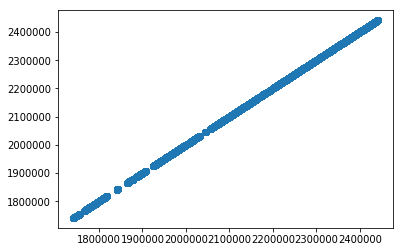

In [388]:
plt.scatter(descut['row'],out_data['row'])

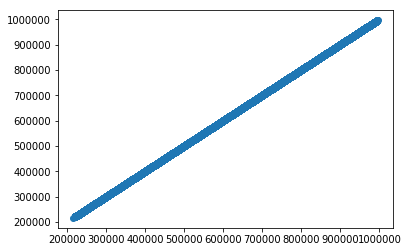

In [389]:
plt.scatter(cosmocut['row'],out_data['rowCOSMOS'])

In [390]:
rabs  = out_data['rabs']
rabst = cosmocut['MR']

masst = descut['smass']
mass  = out_data['mass']

log_residual = filter_nan_inf(mass-masst)#get_log(residual)
residual     = 10**log_residual

zt    = descut['z_true']
z     = out_data['best_zmet']

model = out_data['best_model']
chisq = out_data['best_chisq']

Text(0.5,0,'mass_COSMOS')

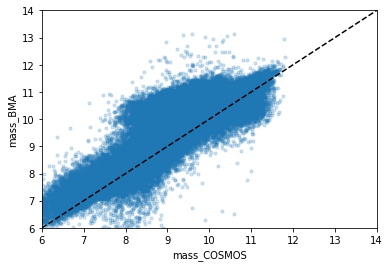

In [391]:
plt.scatter(masst,mass,s=10,alpha=0.2)
plt.plot([6,14],[6,14],'k--')
plt.xlim(6.,14)
plt.ylim(6.,14)
plt.ylabel('mass_BMA')
plt.xlabel('mass_COSMOS')

Text(0.5,0,'log_residual (mass)')

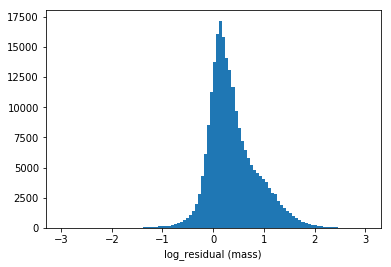

In [392]:
_ = plt.hist(log_residual,bins=np.linspace(-3.,3.,101))
plt.xlabel('log_residual (mass)')

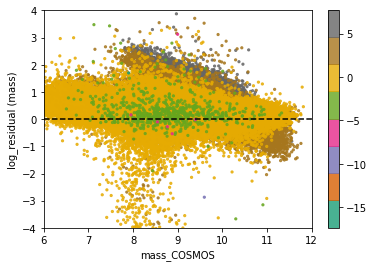

In [393]:
idx = np.argsort(-1*chisq)
plt.scatter(masst[idx],log_residual[idx],s=5,alpha=0.8,c=np.log10(chisq)[idx],cmap='Dark2')
plt.plot([6.,12.],[0,0],'k--')
plt.xlim(6.,12.)
plt.ylim(-4,4)
plt.xlabel('mass_COSMOS')
plt.ylabel('log_residual (mass)')
plt.colorbar()

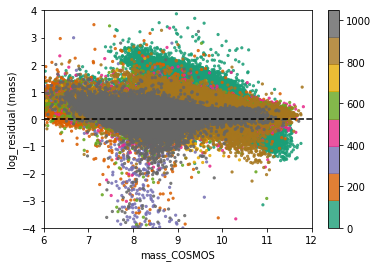

In [394]:
idx = np.argsort(model)
plt.scatter(masst[idx],log_residual[idx],s=5,alpha=0.8,c=model[idx],cmap='Dark2')
plt.plot([6.,12.],[0,0],'k--')
plt.xlim(6.,12.)
plt.ylim(-4,4)
plt.xlabel('mass_COSMOS')
plt.ylabel('log_residual (mass)')
plt.colorbar()

Text(0,0.5,'log_residual (mass)')

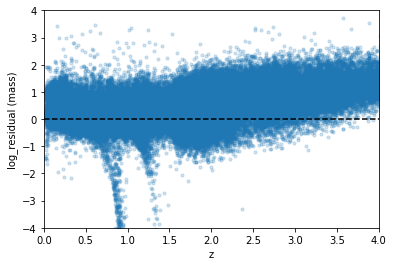

In [395]:
plt.scatter(zt,log_residual,s=10,alpha=0.2)
plt.plot([0,4.],[0,0],'k--')
plt.xlim(0.,4.)
plt.ylim(-4,4)
plt.xlabel('z')
plt.ylabel('log_residual (mass)')

(-27, -10.0)

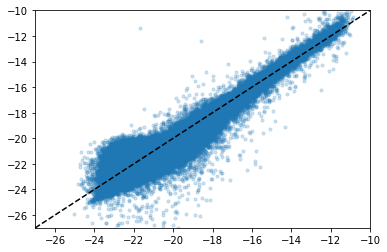

In [400]:
plt.scatter(rabst,rabs,s=10,alpha=0.2)
plt.plot([-27.,-10.],[-27.,-10.],'k--')
plt.xlim(-27,-10.)
plt.ylim(-27,-10.)
# plt.xlabel('z')
# plt.ylabel('log_residual (mass)')

In [397]:
cut = mass<5

In [398]:
mass[cut]

4.766393064528105
4.858564710593929
3.632501740015668
4.103073808399369
3.475884975719411
4.622077921774561
4.811128930730897
4.504007639195431
4.28620961352617
4.258673634682525
4.997812212390001


# Prepare input files

In [136]:
### copied from: https://github.com/esheldon/sdsspy/blob/master/sdsspy/util.py

def mag2nmgy(mag, magerr=None):
    """
    Name:
        mag2nmgy
    Purpose:
        Convert from magnitudes to nano-maggies.  The basic formula
        is 
            mag = 22.5-2.5*log_{10}(nanomaggies)
        The mag error can optionally be sent, in which case the inverse
        variance of the nanomaggies is returned.
    Calling Sequence:
        nmgy = mag2nmgy(mag)
        nmgy,ivar = mag2nmgy(mag, magerr=magerr)
            
    """
    mag = np.array(mag, ndmin=1, copy=False)

    nmgy = 10.0**( (22.5-mag)/2.5 )
    if magerr is not None:
        ivar = nmgy.copy()
        ivar[:] = 0.0

        w = np.where( (nmgy > 0.) & (magerr > 0.) )

        if w[0].size > 0:
            a = 2.5/np.log(10)
            ivar[w] = ( a/nmgy[w]/magerr[w] )**2

        return nmgy, ivar
    else:
        return nmgy
    
def nmgy2lups(nmgy, ivar=None, band=None):
    """
    Name:
        nmgy2lups
    Purpose:
        Convert from nano-maggies to luptitudes, which are asinh based
        mags.  The default parameters for SDSS are used.
    Calling Sequence:
        lup = nmgy2lups(nmgy)
        lup,err = nmgy2lups(nmgy, ivar=ivar)
    Inputs:
        nmgy: SDSS nanomaggies.  Can either be a [5,Nobj] array or
            an array for a single band, in which case the band must
            be given.
    Keywords:
        ivar: The inverse variance.  Must have the same shape as nmgy.
            If ivar is sent, then a tuple (lup,luperr) is returned.
    Outputs:
        The luptitudes as asinh values.  If ivar= is sent, a tuple
        is returned (lup,luperr)
    """
    s = nmgy.shape
    if ivar is not None:
        sivar = ivar.shape
        if len(sivar) != len(s):
            raise ValueError("ivar and fluxes must be same shape")
        for i in xrange(len(s)):
            if sivar[i] != s[i]:
                raise ValueError("ivar and fluxes must be same shape")

    if len(s) == 2:
        if s[1] != 4:
            raise ValueError("Either enter a 1-d array or a (nobj, 5) array")
        nband = 4
        band=[0,1,2,3]
    else:
        if band is None:
            raise ValueError("For 1-d input, specify a band in [0,4]")
        nband = 1
        try:
            if len(band) != 1:
                raise ValueError("for 1-d input, enter a single band")
        except:
            band = [band]

    # make sure band values makes sense
    for b in band:
        if b not in [0,1,2,3]:
            raise ValueError("band must be in [0,4]")

    lups = np.array( nmgy, copy=True )
    lups[:] = -9999.0
    if ivar is not None:
        lups_err = np.array(ivar, copy=True)
        lups_err[:] = -9999.0

    for b in band:
        if nband == 1:
            lups[:] = _nmgy2lups_1band(nmgy, b)
            if ivar is not None:
                lups_err[:] = _ivar2luperr_1band(nmgy, ivar, b)
        else:
            lups[:,b] = _nmgy2lups_1band(nmgy[:,b], b)
            if ivar is not None:
                lups_err[:,b] = _ivar2luperr_1band(nmgy[:,b], ivar[:,b], b)

    if ivar is not None:
        return lups, lups_err
    else:
        return lups

def lups2nmgy(lups, err=None, band=None):
    """
    Name:
        lups2nmgy
    Purpose:
        Convert from luptitudes to nano-maggies. The default parameters 
        for SDSS are used.
    Calling Sequence:
        nmgy= lups2nmgy(lups)
        nmgy,ivar= lups2nmgy(lups,err=err)
    Inputs:
        lups: The luptitudes as asinh values. Can either be a [5,Nobj] array or
         an array for a single band, in which case the band must
         be given.
    Keywords:
       err: uncertainty on the lups.  Must have the same shape as nmgy.
            If err is sent, then a tuple (nmgy,ivar) is returned.
    Outputs:
         SDSS nanomaggies. If err= is set then the inverse variance is returned
         as well as (nmgy,ivar)
    """
    s = lups.shape
    if err is not None:
        serr = err.shape
        if len(serr) != len(s):
            raise ValueError("err and lups must be same shape")
        for i in xrange(len(s)):
            if serr[i] != s[i]:
                raise ValueError("err and lups must be same shape")

    if len(s) == 2:
        if s[1] != 5:
            raise ValueError("Either enter a 1-d array or a (nobj, 5) array")
        nband = 5
        band=[0,1,2,3,4]
    else:
        if band is None:
            raise ValueError("For 1-d input, specify a band in [0,4]")
        nband = 1
        try:
            if len(band) != 1:
                raise ValueError("for 1-d input, enter a single band")
        except:
            band = [band]

    # make sure band values makes sense
    for b in band:
        if b not in [0,1,2,3,4]:
            raise ValueError("band must be in [0,4]")

    nmgy = np.array( lups, copy=True )
    nmgy[:] = -9999.0
    if err is not None:
        ivar = np.array(err, copy=True)
        ivar[:] = -9999.0

    for b in band:
        if nband == 1:
            nmgy[:] = _lups2nmgy_1band(lups, b)
            if err is not None:
                ivar[:] = _luperr2ivar_1band(lups, err, b)
        else:
            nmgy[:,b] = _lups2nmgy_1band(lups[:,b], b)
            if err is not None:
                ivar[:,b] = _luperr2ivar_1band(lups[:,b], err[:,b], b)

    if err is not None:
        return nmgy, ivar
    else:
        return nmgy

_bvalues=[0.9, 1.2, 1.8, 7.4]
_log10 = np.log(10.0)

ln10_min10 = -23.02585
def _nmgy2lups_1band(nmgy, band):
    b=_bvalues[band]
    lups = 2.5*(10.0-np.log10(b)) - 2.5*np.arcsinh(5.0*nmgy/b)/_log10
    return lups

def _ivar2luperr_1band(nmgy, ivar, band):
    b=_bvalues[band]
    lups_err = np.array(ivar, copy=True)
    lups_err[:] = -9999.0
    w,=np.where(ivar > 0.0)
    if w.size > 0:
        terr = 1.0/np.sqrt(ivar[w])
        lups_err[w] = 2.5*terr
        lups_err[w] /= 0.2*b*_log10*np.sqrt(1.0 + (5.0*nmgy[w]/b)**2 )
    return lups_err

def _lups2nmgy_1band(lups, band):
    b=_bvalues[band]
    nmgy= b/5.*np.sinh(-lups*np.log(10.)/2.5-ln10_min10-np.log(b))
    return nmgy

def _luperr2ivar_1band(lups, err, band):
    b=_bvalues[band]
    df= b/5.*np.cosh(-lups*np.log(10.)/2.5-ln10_min10-np.log(b))\
        *err*np.log(10.)/2.5
    return 1./df**2.

In [137]:
filters = ['G','R','I','Z']
mag = np.vstack([des['MAG_%s'%ci] for ci in filters]).T

In [138]:
mag.shape

(523255, 4)

In [139]:
filters = ['G','R','I','Z']
mag   = np.vstack([des['MAG_%s'%ci] for ci in filters]).T
magerr= np.vstack([des['MAGERR_%s'%ci] for ci in filters]).T

## convert to flux
nmgy,ivar = mag2nmgy(mag, magerr=magerr)

## convert to lupmag
lup,err = nmgy2lups(nmgy, ivar=ivar)


In [141]:
np.count_nonzero(np.isnan(get_log(err[:,0])))

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


0

Text(0.5,0,'mag')

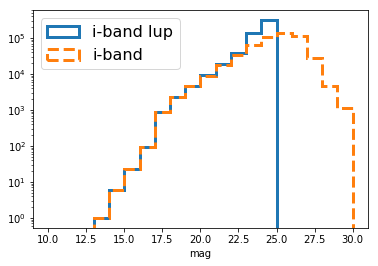

In [142]:
a = plt.hist(lup[:,2],bins=np.linspace(10,30,21),histtype='step',lw=3,label='i-band lup')
_ = plt.hist(mag[:,2],bins=a[1],histtype='step',lw=3,ls='--',label='i-band')
plt.yscale('log')
plt.legend(loc=2,fontsize=16)
plt.xlabel('mag')

Text(0.5,0,'mag error')

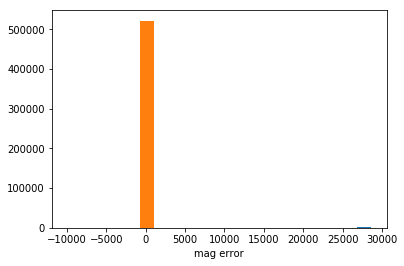

In [143]:
a = plt.hist(err[:,2],bins=21)
_ = plt.hist(magerr[:,2],bins=a[1])
plt.xlabel('mag error')

Text(0.5,0,'mag error')

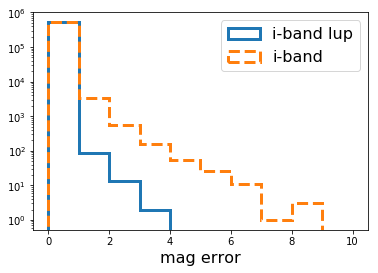

In [144]:
a = plt.hist(err[:,2],bins=np.linspace(0.,10.,11),histtype='step',lw=3,label='i-band lup')
a = plt.hist(magerr[:,2],bins=a[1],histtype='step',lw=3,ls='--',label='i-band')
plt.legend(loc=1,fontsize=16)
plt.yscale('log')
plt.xlabel('mag error',fontsize=16)

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


Text(0.5,0,'mag error')

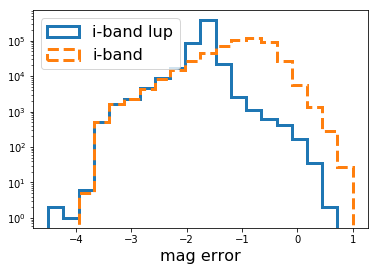

In [145]:
a = plt.hist(get_log(err[:,2]),bins=np.linspace(-4.5,1.,21),histtype='step',lw=3,label='i-band lup')
a = plt.hist(get_log(magerr[:,2]),bins=a[1],histtype='step',lw=3,ls='--',label='i-band')
plt.legend(loc=2,fontsize=16)
plt.yscale('log')
plt.xlabel('mag error',fontsize=16)

In [ ]:
## assume COSMO Photo-z as true redshift
des['z_true'] = cosmo['ZPDF']


In [ ]:
def make_bma_input_temp_file(data,files,nsize,nchunks):
    mcols       = ['mid','CID','z_true','mag','magerr','Mr']                ## master/main/ columns
    out_columns = ['mid','CID','redshift','i','ierr','gr','ri','iz','grerr','rierr','izerr']
    
    if not os.path.isfile(files[0]):
        out['indices'] = np.arange(0,len(data),1,dtype=np.int64)

        out['i']    = data['MAG_I']
        out['ierr'] = data['MAGERR_I']

        out['gr']   = data['MAG_G']-data['MAG_R']
        out['ri']   = data['MAG_R']-data['MAG_I']
        out['iz']   = data['MAG_I']-data['MAG_Z']

        out['grerr']= np.sqrt(data['MAGERR_G']**2+data['MAGERR_R']**2)
        out['rierr']= np.sqrt(data['MAGERR_R']**2+data['MAGERR_I']**2)
        out['izerr']= np.sqrt(data['MAGERR_I']**2+data['MAGERR_Z']**2)
        
        out['redshift'] = data['z_true']
        write_bma_dict_temp_files(files,out,nsize,nchunks)
    return out

In [ ]:
def write_bma_dict_temp_files(files,table,nsize,nchunks):
    columns = table.colnames
    idxs    = np.linspace(0,nsize,nchunks+1,dtype=np.int64)
    
    for i,file in enumerate(files):
        if not os.path.isfile(file):
            hf = h5py.File(file,'w')
            hf.create_group('bma')
            for col in columns:
                ilo,iup = idxs[i],idxs[i+1]
                hf.create_dataset('bma/%s/'%col,data=table[col][ilo:iup])
            hf.close()
    return files

# Auxialiary Functions

In [122]:
def check_not_hf5(hf,path):
    return path not in hf.keys()

def delete_group(fname,path):
    fmaster = h5py.File(fname,'a')
    try:
        group   = fmaster[path]
    except:
        fmaster.close()
        return

    cols = group.keys()
    if len(cols)>0:
        for col in cols: del group[col]
    fmaster.close()
    
def stack_dict(in_list):
    columns = list(in_list[0].keys())
    new_dict= dict().fromkeys(columns)
    for col in columns:
        res = [mydict[col] for mydict in in_list]
        new_dict[col] = np.concatenate(res)
    return new_dict

def read_hdf5_file_to_dict(file,cols=None,indices=None,path='/'):
    hf = h5py.File(file, 'r')
    
    mygroup = hf[path]

    if cols is None: cols  = list(mygroup.keys())
    if indices is None: indices = np.arange(0,len(mygroup[cols[0]]),1,dtype=np.int64)

    mydict= dict().fromkeys(cols)
    for col in cols:
        mydict[col] = mygroup[col][:][indices]
    
    hf.close()

    return mydict


# Visualizing the input sample

In [180]:
data

{'CID': array([ 91600026411,  91600026411,  91600026411, ..., 102000186338,
        102000186338, 102000186338]),
 'Mr': array([-21.38117 , -20.044697, -18.567278, ..., -20.867363, -20.10088 ,
        -19.536366], dtype=float32),
 'gr': array([1.13479424, 0.84538269, 1.05239105, ..., 1.61550903, 0.93707848,
        1.35031891]),
 'grerr': array([0.00666416, 0.02346434, 0.04170643, ..., 0.10027803, 0.06970059,
        0.19854481]),
 'i': array([18.01560726, 20.23461514, 20.80471928, ..., 21.13563352,
        21.67952703, 22.39036397]),
 'ierr': array([0.00399152, 0.01580468, 0.02324518, ..., 0.02921337, 0.04279864,
        0.07117561]),
 'indices': array([     0,      1,      2, ..., 367443, 367444, 367445]),
 'iz': array([0.29990005, 0.26721573, 0.25525856, ..., 0.39838219, 0.18682289,
        0.25603676]),
 'izerr': array([0.00617117, 0.02434872, 0.03723495, ..., 0.04484057, 0.08019943,
        0.1504043 ]),
 'mag': array([[19.65122547, 18.51643124, 18.01560726, 17.71570721],
        

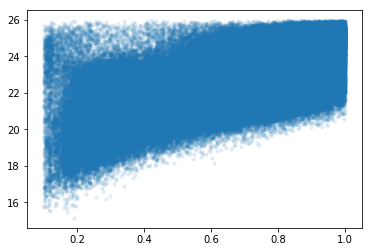

In [181]:
plt.scatter(data['z_true'],data['i'],s=10,alpha=0.1)

# Removing temp files

In [ ]:
def remove_files(files):
    for file in files:
        os.remove(file)

In [ ]:
#remove_files(bma_temp_input_files)
#remove_files(bma_temp_output_files)